In [6]:
import xarray as xr
from glob import glob
from tqdm.notebook import tqdm

In [18]:
flist = glob('../../../data/satellite_ctp/raw/MYD06_L2.A2019004*.hdf')

In [19]:
flist

['../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1735.061.2019005172001.hdf',
 '../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1425.061.2019005170953.hdf',
 '../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1240.061.2019005171408.hdf',
 '../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1605.061.2019005173940.hdf',
 '../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1245.061.2019005172220.hdf',
 '../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1250.061.2019005165859.hdf',
 '../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1600.061.2019005172416.hdf',
 '../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1430.061.2019005165550.hdf',
 '../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1420.061.2019005172115.hdf',
 '../../../data/satellite_ctp/raw/MYD06_L2.A2019004.1555.061.2019005172329.hdf']

In [33]:
for i, file in tqdm(enumerate(flist)):
    
    ds = xr.open_dataset(file, engine='netcdf4')
    
    lon = ds['Longitude'].values.flatten()
    lat = ds['Latitude'].values.flatten()
    ctp = ds['Cloud_Top_Pressure'].values.flatten()
    ctt = ds['Cloud_Top_Temperature'].values.flatten()
    tim = ds['Scan_Start_Time'].values.flatten()
    
    da = xr.Dataset(data_vars =
                    {'Cloud_Top_Temperature': (['time'], ctt),
                     'Cloud_Top_Pressure'   : (['time'], ctp),
                    },
                    
                    coords =
                    {'time': tim,
                     'lon' : (['time'], lon),
                     'lat' : (['time'], lat)
                    },
                   )
            
    if i==0:            
        new_ds=da
    
    if i>0:
        new_ds = xr.concat([new_ds, da], dim='time')
    
    ds.close()
    da.close()
    del(ds)
    del(da)
        
new_ds.to_netcdf('../../../data/satellite_ctp/processed/modis_ctt_ctp.nc')

del(new_ds)
                

0it [00:00, ?it/s]

In [34]:
ds = xr.open_dataset('../../../data/satellite_ctp/processed/modis_ctt_ctp.nc')

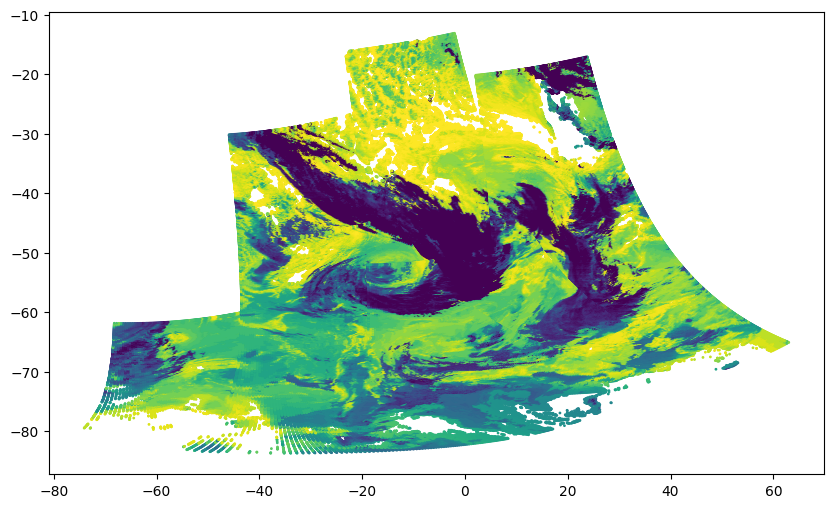

In [37]:
fig,ax=plt.subplots(figsize=(10,6))

img = ax.scatter(ds['lon'], ds['lat'], s=1, c=ds['Cloud_Top_Pressure'], 
                  vmin=300, vmax=1000)